In [1]:
# Imports for plotting, data manipulation, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [2]:
game_df = pd.read_csv('Clean_MLB_Data.csv')

In [3]:
game_df.drop(game_df.columns[0], axis = 1, inplace = True)
game_df.columns = game_df.columns.str.strip()

In [4]:
game_df.head()

,New_Date,VisitingTeam,VisitorStartingPitcherName,HomeTeam,HomeStartingPitcherName,VisitorRunsScored,HomeRunsScore,VisitorAB,VisitorH,Visitor_BA,...,runs_home,runs_avg_home,strikeOuts_home,atBats_home.1,K_avg_home,baseOnBalls_home,BB_avg_home,rbi_home,RBI_avg_home,current_year
0,2023-03-30,MIL,Corbin Burnes,CHC,Marcus Stroman,0,4,29,4,0.138,...,662.0,0.107,1512.0,5523.0,0.274,510.0,0.083,631.0,0.102,2023
1,2023-03-30,PIT,Mitch Keller,CIN,Hunter Greene,5,4,30,6,0.200,...,504.0,0.100,1212.0,4557.0,0.266,371.0,0.073,487.0,0.096,2023
2,2023-03-30,ARI,Zac Gallen,LAD,Julio Urias,2,8,28,4,0.143,...,866.0,0.134,1459.0,5695.0,0.256,638.0,0.099,832.0,0.129,2023
3,2023-03-30,NYM,Max Scherzer,MIA,Sandy Alcantara,5,3,32,8,0.250,...,541.0,0.099,1319.0,4979.0,0.265,408.0,0.074,508.0,0.093,2023
4,2023-03-30,COL,German Marquez,SD,Blake Snell,7,2,44,17,0.386,...,789.0,0.122,1304.0,5661.0,0.230,662.0,0.102,737.0,0.114,2023


In [5]:
drop_lst = ['New_Date',
'VisitingTeam',
'VisitorStartingPitcherName',
'HomeTeam',
'HomeStartingPitcherName',
'VisitorRunsScored', 
'HomeRunsScore', 
'Home_team_won?', 
'VisitorAB',
'VisitorH',
'Visitor_BA',
'VisitorHBP',
'VisitorBB',
'VisitorIBB',
'VisitorLOB',
'HomeAB',
'HomeH',
'Home_BA',
'HomeHBP',
'HomeBB',
'HomeIBB',
'HomeLOB',
'playerName_x',
'teamAbbrev_x',
'playerName_y',
'teamAbbrev_y',
'teamAbbrev_x',
'teamAbbrev_y',
'year_x',
'year_y',
'prior_year']

In [6]:
y = game_df['Home_team_won?']
x = game_df.drop(drop_lst, axis = 1, errors='ignore')
game_df.head()

,New_Date,VisitingTeam,VisitorStartingPitcherName,HomeTeam,HomeStartingPitcherName,VisitorRunsScored,HomeRunsScore,VisitorAB,VisitorH,Visitor_BA,...,runs_home,runs_avg_home,strikeOuts_home,atBats_home.1,K_avg_home,baseOnBalls_home,BB_avg_home,rbi_home,RBI_avg_home,current_year
0,2023-03-30,MIL,Corbin Burnes,CHC,Marcus Stroman,0,4,29,4,0.138,...,662.0,0.107,1512.0,5523.0,0.274,510.0,0.083,631.0,0.102,2023
1,2023-03-30,PIT,Mitch Keller,CIN,Hunter Greene,5,4,30,6,0.200,...,504.0,0.100,1212.0,4557.0,0.266,371.0,0.073,487.0,0.096,2023
2,2023-03-30,ARI,Zac Gallen,LAD,Julio Urias,2,8,28,4,0.143,...,866.0,0.134,1459.0,5695.0,0.256,638.0,0.099,832.0,0.129,2023
3,2023-03-30,NYM,Max Scherzer,MIA,Sandy Alcantara,5,3,32,8,0.250,...,541.0,0.099,1319.0,4979.0,0.265,408.0,0.074,508.0,0.093,2023
4,2023-03-30,COL,German Marquez,SD,Blake Snell,7,2,44,17,0.386,...,789.0,0.122,1304.0,5661.0,0.230,662.0,0.102,737.0,0.114,2023


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def my_train_test_split(x, y, game_df):
    # Get x values to numeric
    x = x.apply(pd.to_numeric, errors='coerce')
    x.fillna(value=-1, inplace=True)
    
    # Ensure we're only working with 2023 data
    mask = game_df['current_year'] == 2023
    x_2023 = x[mask]
    y_2023 = y[mask]
    
    # Print information about the dataset
    print(f"Total rows: {len(x)}")
    print(f"Rows for 2023: {len(x_2023)}")
    
    # Randomly split the 2023 data into two halves
    x_train, x_test, y_train, y_test = train_test_split(
        x_2023, y_2023, test_size=0.20, random_state=42
    )
    
    print(f"Training set size: {len(x_train)}")
    print(f"Test set size: {len(x_test)}")
    
    return x_train, x_test, y_train, y_test

In [8]:
x_train, x_test, y_train, y_test = my_train_test_split(x, y, game_df)


Total rows: 2463
Rows for 2023: 2463
Training set size: 1970
Test set size: 493


In [9]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a base model
rf = RandomForestClassifier()

# Instantiate the random search model
random_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
random_search.fit(x_train, y_train)

# Get the best parameters
print(random_search.best_params_)

# Use the best model for predictions
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(x_test)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\bob_b\anaconda3.1\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
57 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\bob_b\anaconda3.1\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\bob_b\anaconda3.1\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\bob_b\anaconda3.1\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\bob_b\anaconda3.1\Lib\si

{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': True}


In [10]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score', accuracy)

Accuracy Score 0.537525354969574


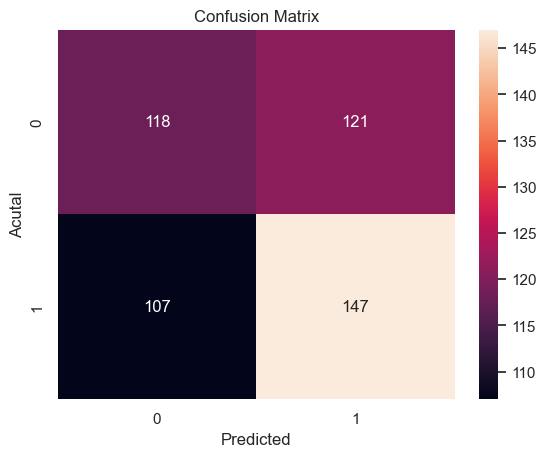

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Acutal')
plt.title('Confusion Matrix')
plt.show()


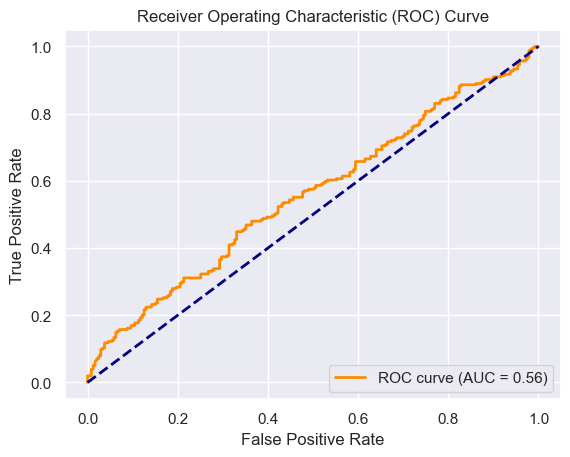

In [12]:
from sklearn.metrics import roc_curve, auc

y_pred_probability = best_rf.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_probability)
roc_auc = auc(fpr,tpr)

plt.figure();
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = "--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

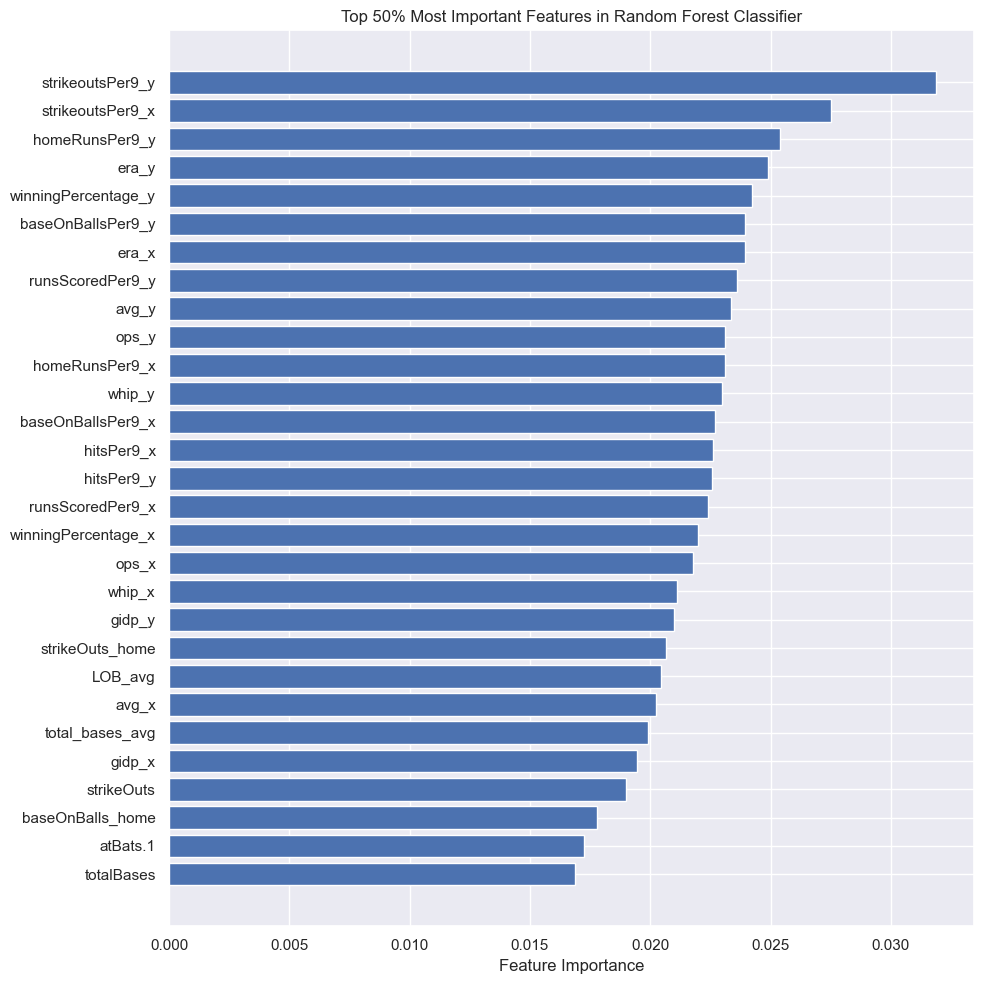

In [13]:
import numpy as np
import matplotlib.pyplot as plt

feature_importance = best_rf.feature_importances_

sorted_idx = np.argsort(feature_importance)
n_features = len(sorted_idx)
top_half = int(n_features / 2)
sorted_idx = sorted_idx[-top_half:]


pos = np.arange(len(sorted_idx)) + 0.5

plt.figure(figsize=(10, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')

plt.yticks(pos, np.array(x_train.columns)[sorted_idx])


plt.xlabel('Feature Importance')
plt.title('Top 50% Most Important Features in Random Forest Classifier')

plt.tight_layout()

plt.show()

In [14]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf, x_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.51269036 0.53045685 0.54568528 0.57106599 0.57360406]
Mean CV score: 0.5467


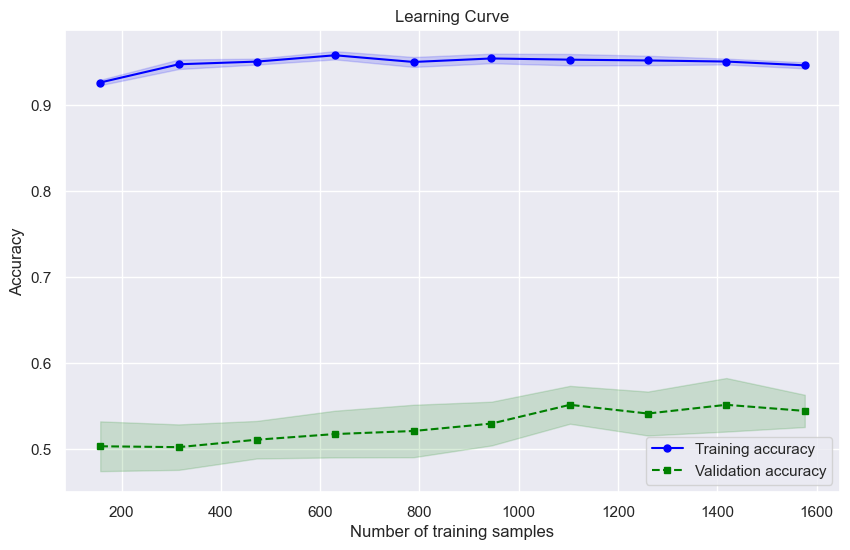

In [15]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_rf, x_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()

Linear Regression

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
y = game_df['Home_team_won?']
x = game_df.drop(drop_lst, axis = 1, errors='ignore')

x_train, x_test, y_train, y_test = my_train_test_split(x, y, game_df)

Total rows: 2463
Rows for 2023: 2463
Training set size: 1970
Test set size: 493


In [19]:
lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print("RMSE: ", rmse)
r2 = r2_score(y_test, y_pred)  # R² Score
print("R^2 ", r2)

RMSE:  0.5043335262930164
R^2  -0.018351951348574147


Regression does horibly. A horizontal line would perform better

XG Boost

In [4]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print("RMSE: ", rmse)
r2 = r2_score(y_test, y_pred)  # R² Score
print("R^2 ", r2)
#  metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


RMSE:  0.324037034920393
R^2  0.5779318661441061

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.89        93
           1       0.95      0.85      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200


Confusion Matrix:
 [[88  5]
 [16 91]]
